# Persiapan Import Data

## Import Library

In [1]:
import os
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Import Data

In [114]:
df = pd.read_excel (r'C:\Users\Atam Rifai S\OneDrive - ITPLN\OneDrive - Komputer\Script\Machine Learning\Dicoding\Dicoding Submission\Ekspor Ikan Kabupaten Situbondo 2016-2017.xls')
df

,Jenis Ikan,TON,RP (000)
0,Layang,1936.11,24434115
1,Kembung,569.30,5567780
2,Kerapu,634.43,21996270
3,Tongkol,2093.76,25009640
4,Tengiri,0.00,0
5,Bambangan,686.00,20694850
6,Selar,601.25,4597448
7,Teri,616.27,8436795
8,Lemuru,136.83,704350
9,Layur,330.32,5512290


## Melihat informasi Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Jenis Ikan  25 non-null     object 
 1   TON         25 non-null     float64
 2   RP (000)    25 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes


In [28]:
 Plottidf.describe()

,TON,RP (000)
count,25.000000,2.500000e+01
mean,553.266400,8.400912e+06
std,511.102856,8.321464e+06
min,0.000000,0.000000e+00
25%,286.100000,1.973600e+06
50%,448.960000,5.567780e+06
75%,616.270000,1.047394e+07
max,2093.760000,2.500964e+07


## Plotting Data Hasil Import

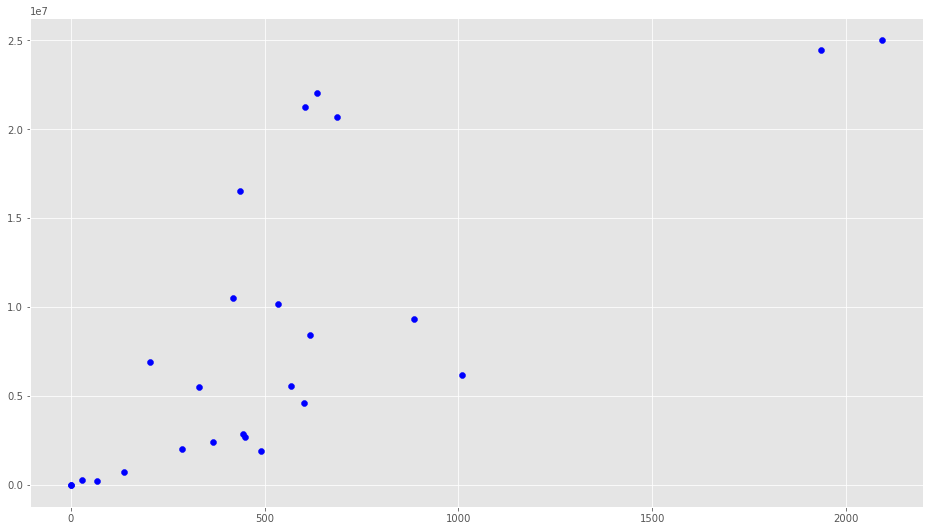

In [26]:
f1 = df["TON"].values
f2 = df["RP (000)"].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='Blue')

# Algoritma Clustering dengan Algoritma Euclidean Distance

### Membuat rumus Algoritma Euclidean Distance

In [30]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

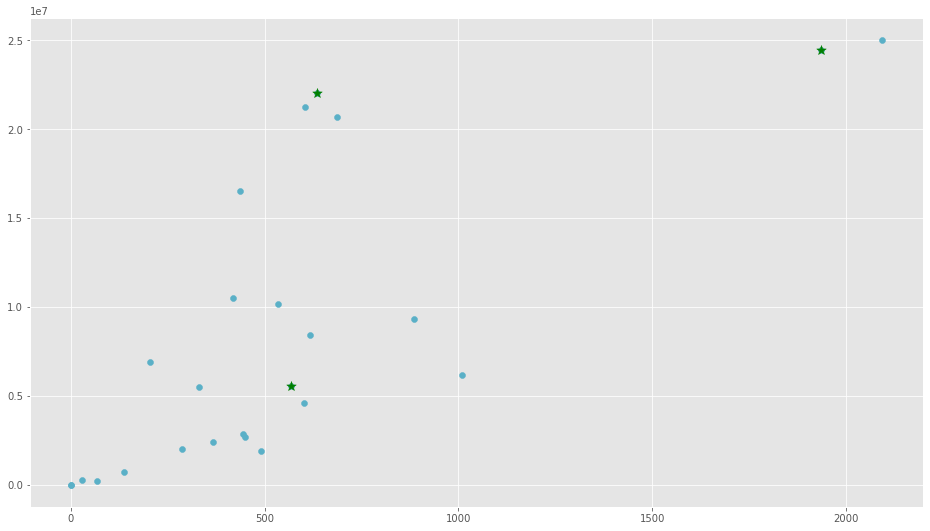

In [38]:
k = 3
C = X[0:3]
plt.scatter(f1, f2, c="#5ab0c7")
plt.scatter(C[:,0], C[:,1], marker="*", s=100, c='g')

### Membuat Area Clustering

In [39]:
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))

error = dist(C, C_old, None)

count = 1
while (error !=0):
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(C)
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_21436\2131041208.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hasil = np.array(list(zip(df["Jenis Ikan"], clusters)))


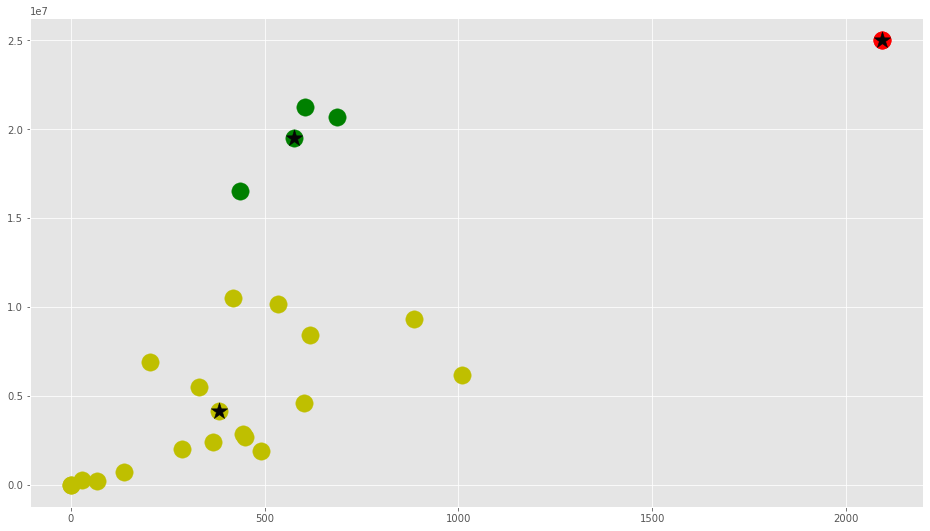

In [104]:
colors = ['r', 'y', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=300, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=300, c='#050505')

hasil = np.array(list(zip(df["Jenis Ikan"], clusters)))

## Output Clustering dengan Euclidean

### Mengelempokkan hasil clustering berdasarkan jenis ikan


In [103]:
hasil = ('Jenis Ikan', df["Jenis Ikan"].values), ('Cluster', clusters)
hasil

(('Jenis Ikan',
  array(['Jenis Ikan',
         array(['Layang', 'Kembung', 'Kerapu', 'Tongkol', 'Tengiri', 'Bambangan',
                'Selar', 'Teri', 'Lemuru', 'Layur', 'Petek', 'Cucut', 'Manyung',
                'P a r i', 'Beloso', 'Udang Lainnya', 'Kakap', 'Kurisi', 'Lainnya',
                'Cumi-Cumi', 'Bawal putih', 'Belanak', 'Rajungan', 'Beronang',
                'Kepiting'], dtype=object)                                         ],
        dtype=object)),
 ('Cluster',
  array([0., 1., 2., 0., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
         1., 1., 1., 1., 1., 1., 1., 1.])))

In [106]:
output = ['Layang', 'Kembung', 'Kerapu', 'Tongkol', 'Tengiri', 'Bambangan',
                'Selar', 'Teri', 'Lemuru', 'Layur', 'Petek', 'Cucut', 'Manyung',
                'P a r i', 'Beloso', 'Udang Lainnya', 'Kakap', 'Kurisi', 'Lainnya',
                'Cumi-Cumi', 'Bawal putih', 'Belanak', 'Rajungan', 'Beronang',
                'Kepiting'],[0., 1., 2., 0., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
         1., 1., 1., 1., 1., 1., 1., 1.]

### Menampilkan Output Hasil Clustering

In [108]:
df1 = pd.DataFrame (output).transpose()
df1.columns = ['Jenis Ikan', 'Cluster']
print(df1)


       Jenis Ikan Cluster
0          Layang     0.0
1         Kembung     1.0
2          Kerapu     2.0
3         Tongkol     0.0
4         Tengiri     1.0
5       Bambangan     2.0
6           Selar     1.0
7            Teri     1.0
8          Lemuru     1.0
9           Layur     1.0
10          Petek     1.0
11          Cucut     1.0
12        Manyung     1.0
13        P a r i     1.0
14         Beloso     1.0
15  Udang Lainnya     2.0
16          Kakap     2.0
17         Kurisi     1.0
18        Lainnya     1.0
19      Cumi-Cumi     1.0
20    Bawal putih     1.0
21        Belanak     1.0
22       Rajungan     1.0
23       Beronang     1.0
24       Kepiting     1.0


# Klustering K-Means Scikir Learn

In [115]:
df

,Jenis Ikan,TON,RP (000)
0,Layang,1936.11,24434115
1,Kembung,569.30,5567780
2,Kerapu,634.43,21996270
3,Tongkol,2093.76,25009640
4,Tengiri,0.00,0
5,Bambangan,686.00,20694850
6,Selar,601.25,4597448
7,Teri,616.27,8436795
8,Lemuru,136.83,704350
9,Layur,330.32,5512290


In [119]:
ikan_x = df.iloc[:, 1:3]
ikan_x.head()

,TON,RP (000)
0,1936.11,24434115
1,569.30,5567780
2,634.43,21996270
3,2093.76,25009640
4,0.00,0


In [120]:
x_array = np.array(ikan_x)
print(x_array)

[[1.9361100e+03 2.4434115e+07]
 [5.6930000e+02 5.5677800e+06]
 [6.3443000e+02 2.1996270e+07]
 [2.0937600e+03 2.5009640e+07]
 [0.0000000e+00 0.0000000e+00]
 [6.8600000e+02 2.0694850e+07]
 [6.0125000e+02 4.5974480e+06]
 [6.1627000e+02 8.4367950e+06]
 [1.3683000e+02 7.0435000e+05]
 [3.3032000e+02 5.5122900e+06]
 [4.9010000e+02 1.9127500e+06]
 [6.6600000e+01 2.2770000e+05]
 [2.9300000e+01 2.7365000e+05]
 [2.8610000e+02 1.9736000e+06]
 [4.4896000e+02 2.6813950e+06]
 [4.3716000e+02 1.6521050e+07]
 [6.0470000e+02 2.1235825e+07]
 [8.8462000e+02 9.3068200e+06]
 [1.0097600e+03 6.1791700e+06]
 [5.3442000e+02 1.0135220e+07]
 [3.6697000e+02 2.3849800e+06]
 [4.4389000e+02 2.8643550e+06]
 [4.1962000e+02 1.0473935e+07]
 [0.0000000e+00 0.0000000e+00]
 [2.0519000e+02 6.8988200e+06]]


In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.92470484, 0.97698787],
       [0.27190318, 0.22262536],
       [0.3030099 , 0.87951166],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.32764023, 0.82747493],
       [0.28716281, 0.18382704],
       [0.2943365 , 0.33734172],
       [0.06535133, 0.02816314],
       [0.15776402, 0.22040661],
       [0.23407649, 0.07648051],
       [0.0318088 , 0.00910449],
       [0.01399396, 0.01094178],
       [0.13664412, 0.07891357],
       [0.21442763, 0.10721446],
       [0.20879184, 0.66058728],
       [0.28881056, 0.84910558],
       [0.42250306, 0.37212931],
       [0.48227113, 0.24707153],
       [0.25524415, 0.40525253],
       [0.17526842, 0.09536243],
       [0.21200615, 0.11453004],
       [0.20041457, 0.41879591],
       [0.        , 0.        ],
       [0.09800073, 0.27584643]])

In [124]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=123)

In [125]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [126]:
print(kmeans.cluster_centers_)

[[0.18700932 0.16863194]
 [0.28206313 0.80416986]
 [0.96235242 0.98849394]]


In [128]:
df["kluster"] = kmeans.labels_

C:\Users\Atam Rifai S\AppData\Local\Temp\ipykernel_21436\397191477.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(output)


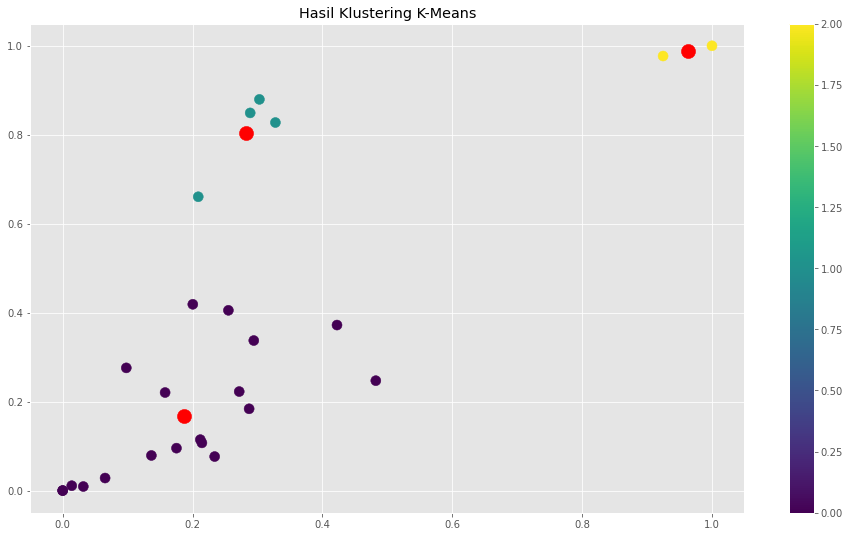

In [129]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()

# Kesimpulan

Dari penggunaan 2 algoritma dengan scikitlearn import K-Means dan dengan mendifinisikan algoritma Euclidiean distance sendiri hasilnya adalah sama sama memiliki ouutput yang sama
